## Student Performance Indicator

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

#### Import CSV as Pandas DataFrame

In [4]:
df=pd.read_csv('data/stud.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [8]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### 3.1 Checking Missing Values

In [12]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### 3.2 Check Duplicates

In [13]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicates

#### 3.3 Check Datatypes

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Unique values

In [15]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### 3.5 Statistical description

In [16]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading much higher = 17

#### 3.7 Exploring Data

In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
df['race_ethinicity']=df['race/ethnicity']

In [28]:
df.drop('race/ethnicity',axis=1, inplace=True)

In [29]:
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race_ethinicity
0,female,bachelor's degree,standard,none,72,72,74,group B
1,female,some college,standard,completed,69,90,88,group C
2,female,master's degree,standard,none,90,95,93,group B
3,male,associate's degree,free/reduced,none,47,57,44,group A
4,male,some college,standard,none,76,78,75,group C


In [19]:
## Numerical and Categorical Features
num_categories=[features for features in df.columns if df[features].dtype!='O']
cat_categories=[features for features in df.columns if df[features].dtype=='O']

print("Numerical Features: ", num_categories)
print("Categorical Features: ",cat_categories)


Numerical Features:  ['math score', 'reading score', 'writing score']
Categorical Features:  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [30]:
print("Categories in 'gender' variable:",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethinicity' variable:",end=" " )
print(df['race_ethinicity'].unique())

print("Categories in 'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:",end=" " )
print(df['lunch'].unique())




Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethinicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']


#### Adding Total Score and Average score

In [31]:
df['total_score']=df['math score']+df['reading score']+ df['writing score']

In [32]:
df['average_score']=df['total_score']/3
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race_ethinicity,total_score,average_score
0,female,bachelor's degree,standard,none,72,72,74,group B,218,72.666667
1,female,some college,standard,completed,69,90,88,group C,247,82.333333
2,female,master's degree,standard,none,90,95,93,group B,278,92.666667
3,male,associate's degree,free/reduced,none,47,57,44,group A,148,49.333333
4,male,some college,standard,none,76,78,75,group C,229,76.333333


In [34]:
reading_full=df[df['reading score']==100]['average_score'].count()
writing_full = df[df['writing score'] == 100]['average_score'].count()
math_full = df[df['math score'] == 100]['average_score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [35]:
reading_less_20 = df[df['reading score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing score'] <= 20]['average_score'].count()
math_less_20 = df[df['math score'] <= 20]['average_score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

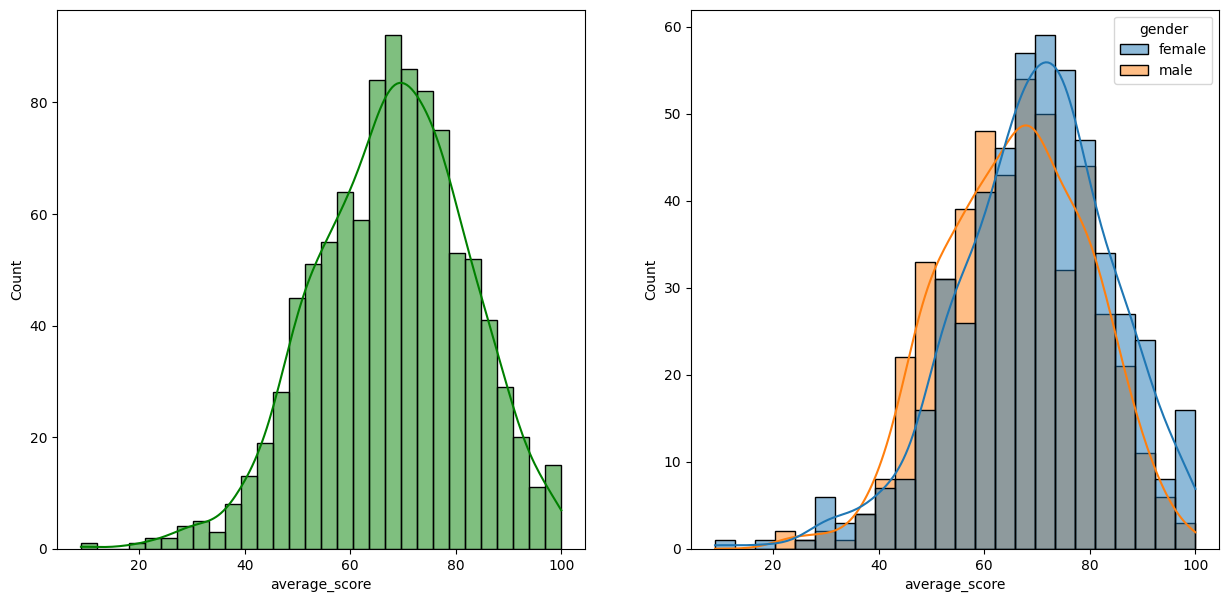

In [39]:
fig,axs=plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

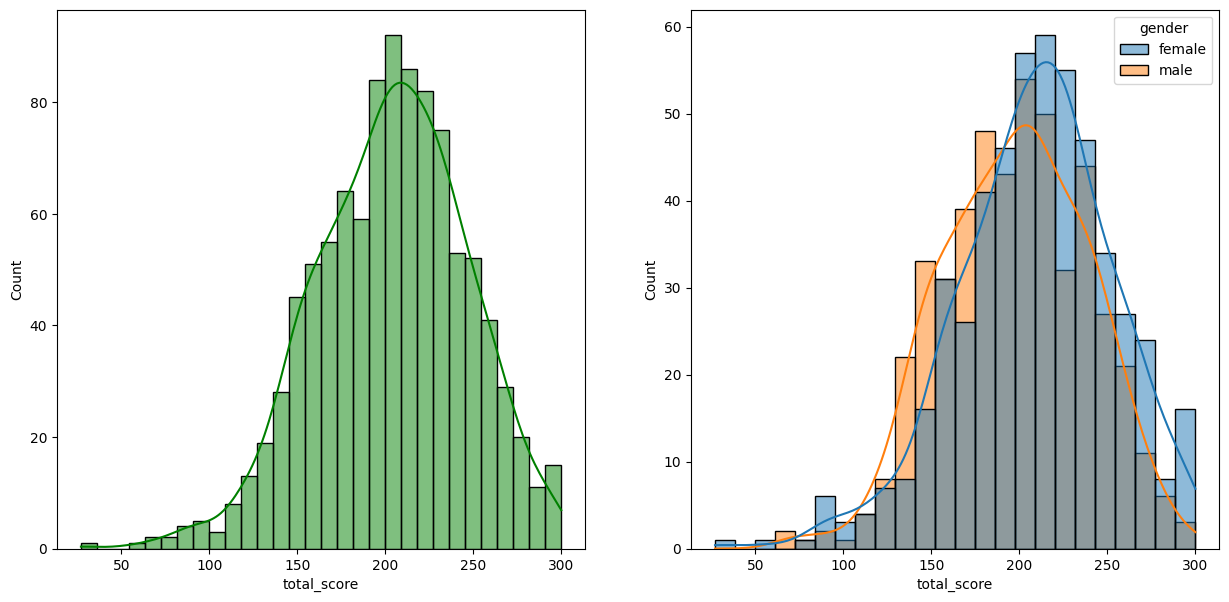

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

#### Insights
- Female have performed better than males